Versionado de los datos

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('Dataset/pinguinos_limpios_codificados_normalizados.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_id,species_id,island_id
0,0.254545,0.666667,0.152542,0.291667,1.0,0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0,1.0
3,0.167273,0.738095,0.355932,0.208333,0.0,0,1.0
4,0.261818,0.892857,0.305085,0.263889,1.0,0,1.0
...,...,...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,0.0,2,0.0
329,0.534545,0.142857,0.728814,0.597222,0.0,2,0.0
330,0.665455,0.309524,0.847458,0.847222,1.0,2,0.0
331,0.476364,0.202381,0.677966,0.694444,0.0,2,0.0


In [5]:
from sklearn.model_selection import train_test_split
y = df['species_id']
X = df.drop('species_id', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
X_train.to_csv('Dataset/train/X_train.csv')
y_train.to_csv('Dataset/train/y_train.csv')
X_test.to_csv('Dataset/test/X_test.csv')
y_test.to_csv('Dataset/test/y_test.csv')

In [314]:
X_train.shape

(266, 6)

In [315]:
import tensorflow as tf
from tensorflow import keras
keras.seed = 42
# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for species
])

# Compile the model
#sparse_categorical_crossentropy si es es multiclase

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32)


Epoch 1/15
9/9 [==============================] - 1s 3ms/step - loss: 1.0226 - accuracy: 0.6466
Epoch 2/15
9/9 [==============================] - 0s 2ms/step - loss: 0.9639 - accuracy: 0.7218
Epoch 3/15
9/9 [==============================] - 0s 2ms/step - loss: 0.9130 - accuracy: 0.7932
Epoch 4/15
9/9 [==============================] - 0s 2ms/step - loss: 0.8550 - accuracy: 0.7932
Epoch 5/15
9/9 [==============================] - 0s 3ms/step - loss: 0.7985 - accuracy: 0.7970
Epoch 6/15
9/9 [==============================] - 0s 2ms/step - loss: 0.7327 - accuracy: 0.7970
Epoch 7/15
9/9 [==============================] - 0s 5ms/step - loss: 0.6656 - accuracy: 0.7970
Epoch 8/15
9/9 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.8008
Epoch 9/15
9/9 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.8008
Epoch 10/15
9/9 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.8008
Epoch 11/15
9/9 [======================

In [316]:
y_pred = model.predict(X_test)
y_pred = y_pred.round()
y_pred

3/3 [==============================] - 0s 4ms/step


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

In [317]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0,
       0])

In [318]:
from sklearn.preprocessing import label_binarize
y_testb = label_binarize(y_test, classes=[0, 1, 2])
y_testb

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1,

In [319]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.9701492537313433
Precisión por clase: [0.93548387 1.         1.        ] -> 0.978494623655914
Sensibilidad por clase: [1.         0.85714286 1.        ] -> 0.9523809523809524
F1 Score por clase: [0.96666667 0.92307692 1.        ] -> 0.9632478632478633


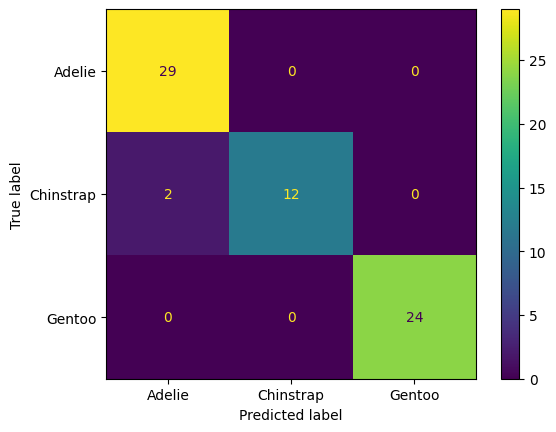

In [320]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['Adelie','Chinstrap','Gentoo']
disp.plot()